<b>Project Name</b>: Making Houses More Appealing for buyers <br>
<b>Dataset</b>: House Prices<br>
<b>Report</b>: Data Storytelling<br>

This report is part of my Capstone Project. It is the sequel of the <a href="http://localhost:8888/edit/Desktop/RAFAEL/SPRINGBOARD/Capstone%20project%201/house-prices/Data%20Wrangling.docx">Data Wrangling report</a>, and we'll use the modified dataset on this report.

The goal of this report is to find interesting insights on the dataset. As stated on the <a href="">Project proposal</a>, we are looking for variables that fits two requirements: <br><br>
1) Can have its value changed by home improvement services and<br>
2) Has a medium to high correlation to the price of the house.<br>
<br>
We already have a <a href="">list</a> of actionable variables, so the first question is: <br>
<h2>How do they correlate to the selling price of the house?</h2><br><br>
First, we'll plot bar plots for every variable against the selling price. Note: All variables are categorical

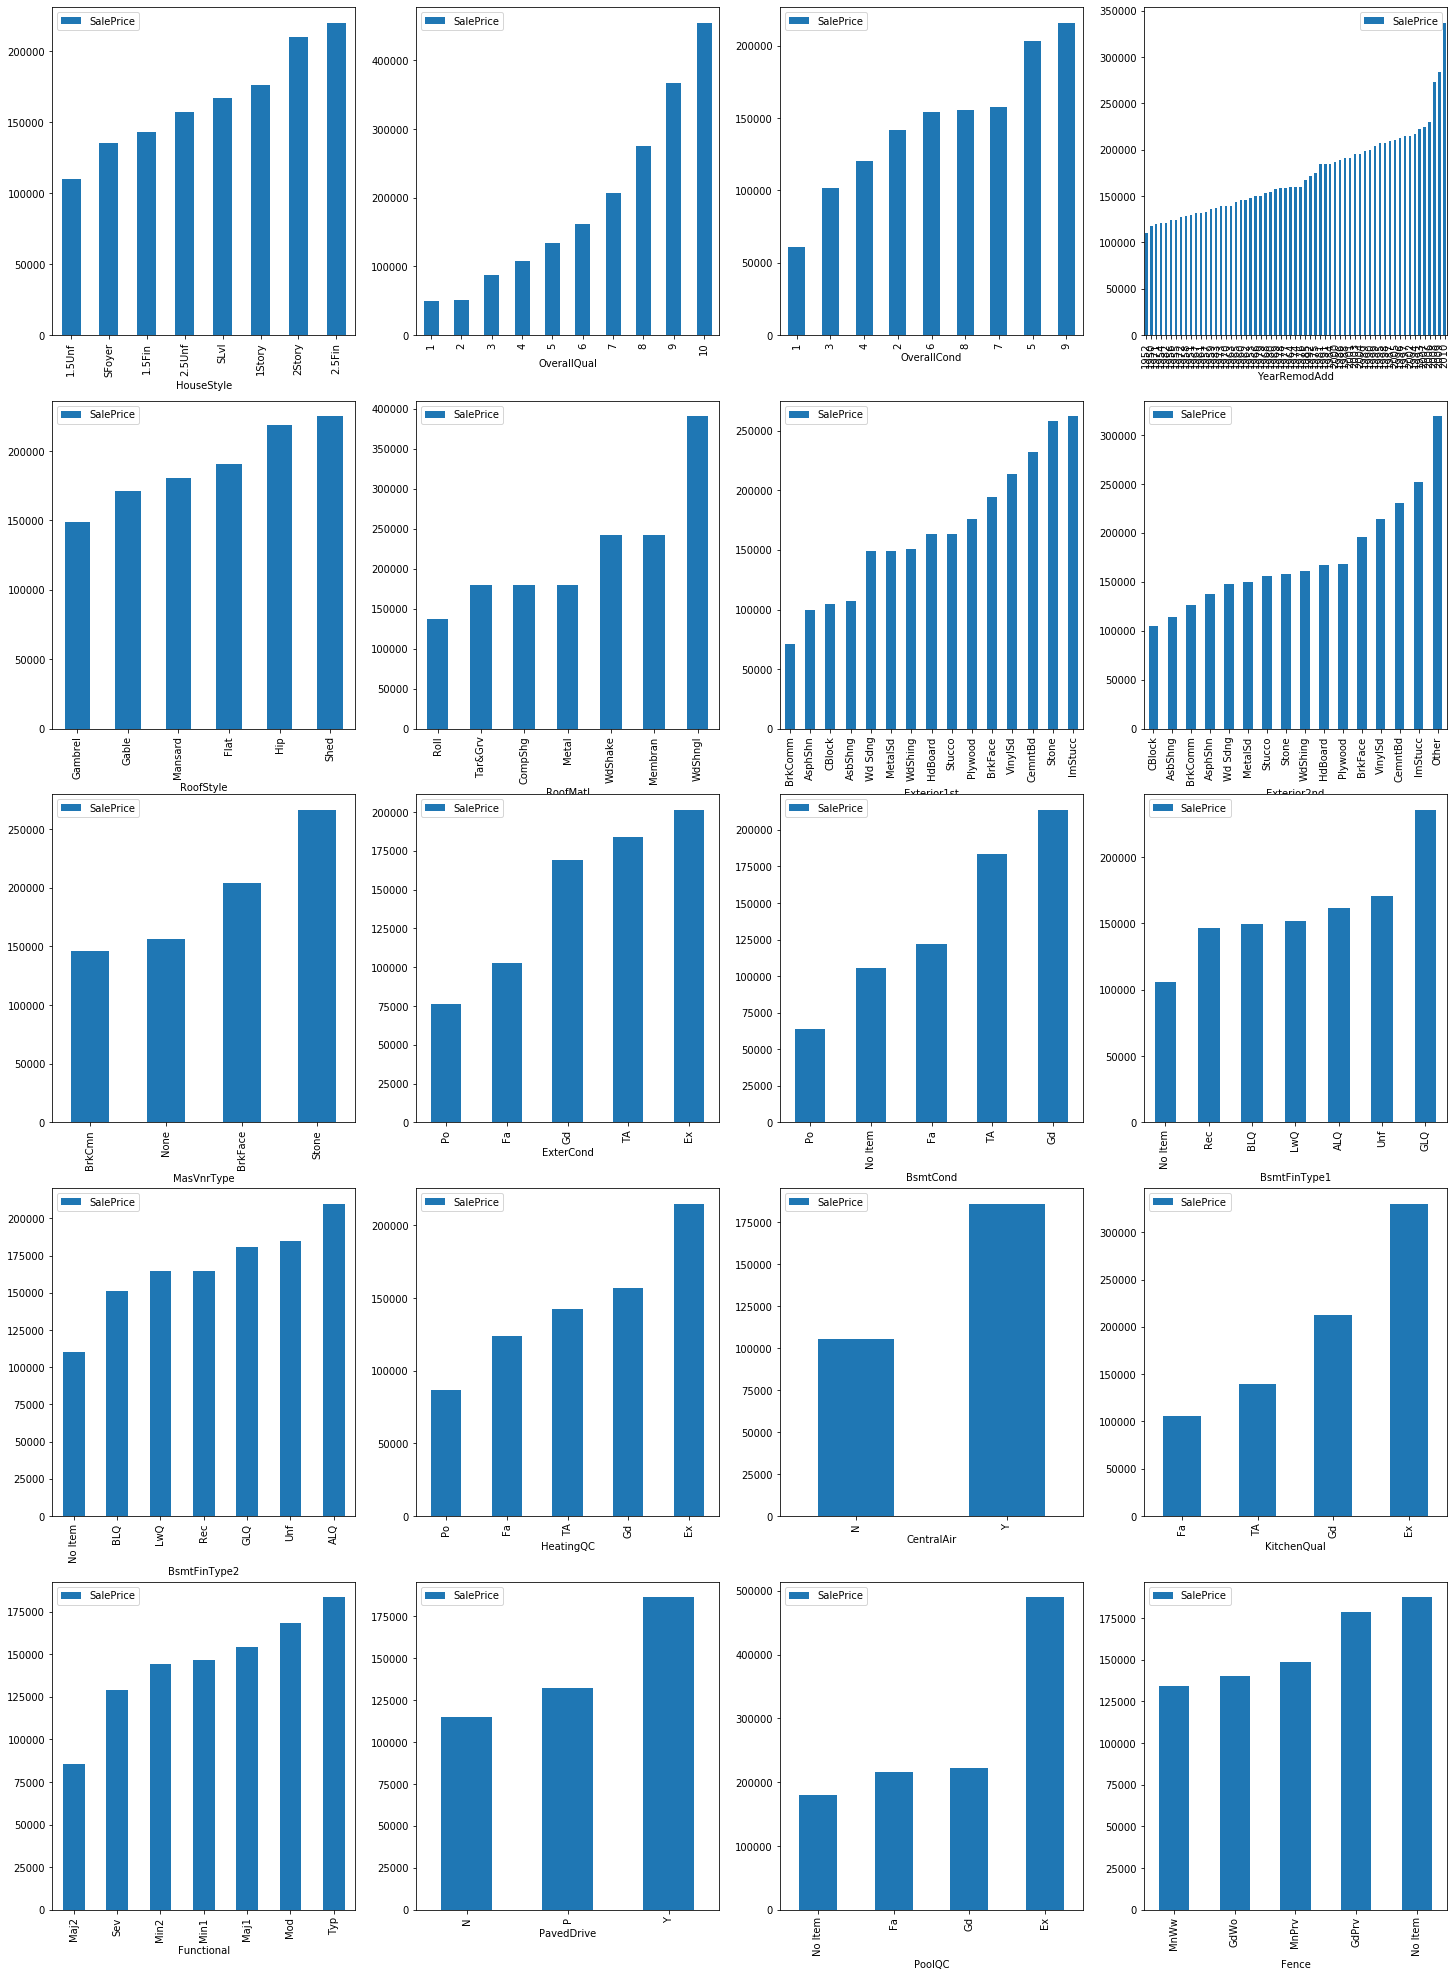

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("DatasetTreated.csv", index_col='Id', header=0)
varList = ['HouseStyle','OverallQual','OverallCond','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
           'MasVnrType','ExterCond','BsmtCond','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','KitchenQual',
           'Functional','PavedDrive','PoolQC','Fence']

fig, axes = plt.subplots(nrows=5, ncols=4)
i=0
j=0
for col in varList:
    df[[col, 'SalePrice']].groupby(col).mean().sort_values('SalePrice').plot(kind="bar", ax=axes[i,j], figsize=(25,35))    
    j+=1    
    if(j==4):
        j=0
        i+=1
    
plt.show()

An obvious conclusion we reach by Analysing the plots above is that every variable studied has significant impact on the average selling price of a house. We came to that conclusion because the variation on the Y axis (Selling Price) is very big amont the different categories for each variable. However, a few questions come to mind:<br><br>
1) <b>Do each of these categories on each plot have enough data?</b> <br>
<i>Why are we asking this question?</i> Pool Quality, for example, shows a huge increment on the selling price when we go from "Good" to "Excellent". Maybe there is only one house with excellent pool condition, and the price of this house is an outlier. We cannot recommend an owner to remodel their pool based only on one observation, expecting the selling price to increase around $300,000.00.<br><br>
2) <b>Are the categories in an expected order?</b><br>
<i>Why are we asking this question?</i> We want to make sure that, on average, a 1 story house is cheaper than a 2 stories house, for example<br><br>
3) <b>Considering the "Year Remodel Date" (first row, fourth column), are the years also ordered from oldest to newest?</b><br>
<i>Why are we asking this question?</i> All our project will make a lot more sense if this is true, because we will be able to combine the effect of "improving one variable with a home service" and "Year Remodel Date being more recent". For example, if an old house has a kitchen quality classified as fair, remodeling the kitchen would have the combined effect of moving the kitchen quality to good or excellent category, as well as moving the Year Remodel Date to a more recent year. There are other variables that may have a combined effect here, like overall quality and overall condition, but it may depend on the size of the improvement.<br><br>
4) <b>Are there any actionable variables that are not worth investing on?</b><br>
<i>Why are we asking this question?</i> Maybe it's not a good idea to change the material of the Masonry Veneer, for example. The investment in the home improvement project would be greater than the increase in the final selling price.<br><br>
5) <b>Regardless of the caracteristics of the houses, considering the year sold, do prices increase along the years on average?</b><br>
<i>Why are we asking this question?</i> Maybe we should consider the effect of inflation through the years.<br><br>
6) <b>Other surprises?</b><br>
Let's tackle these questions!






<b>1) Do each of these categories on each plot have enough data?</b>

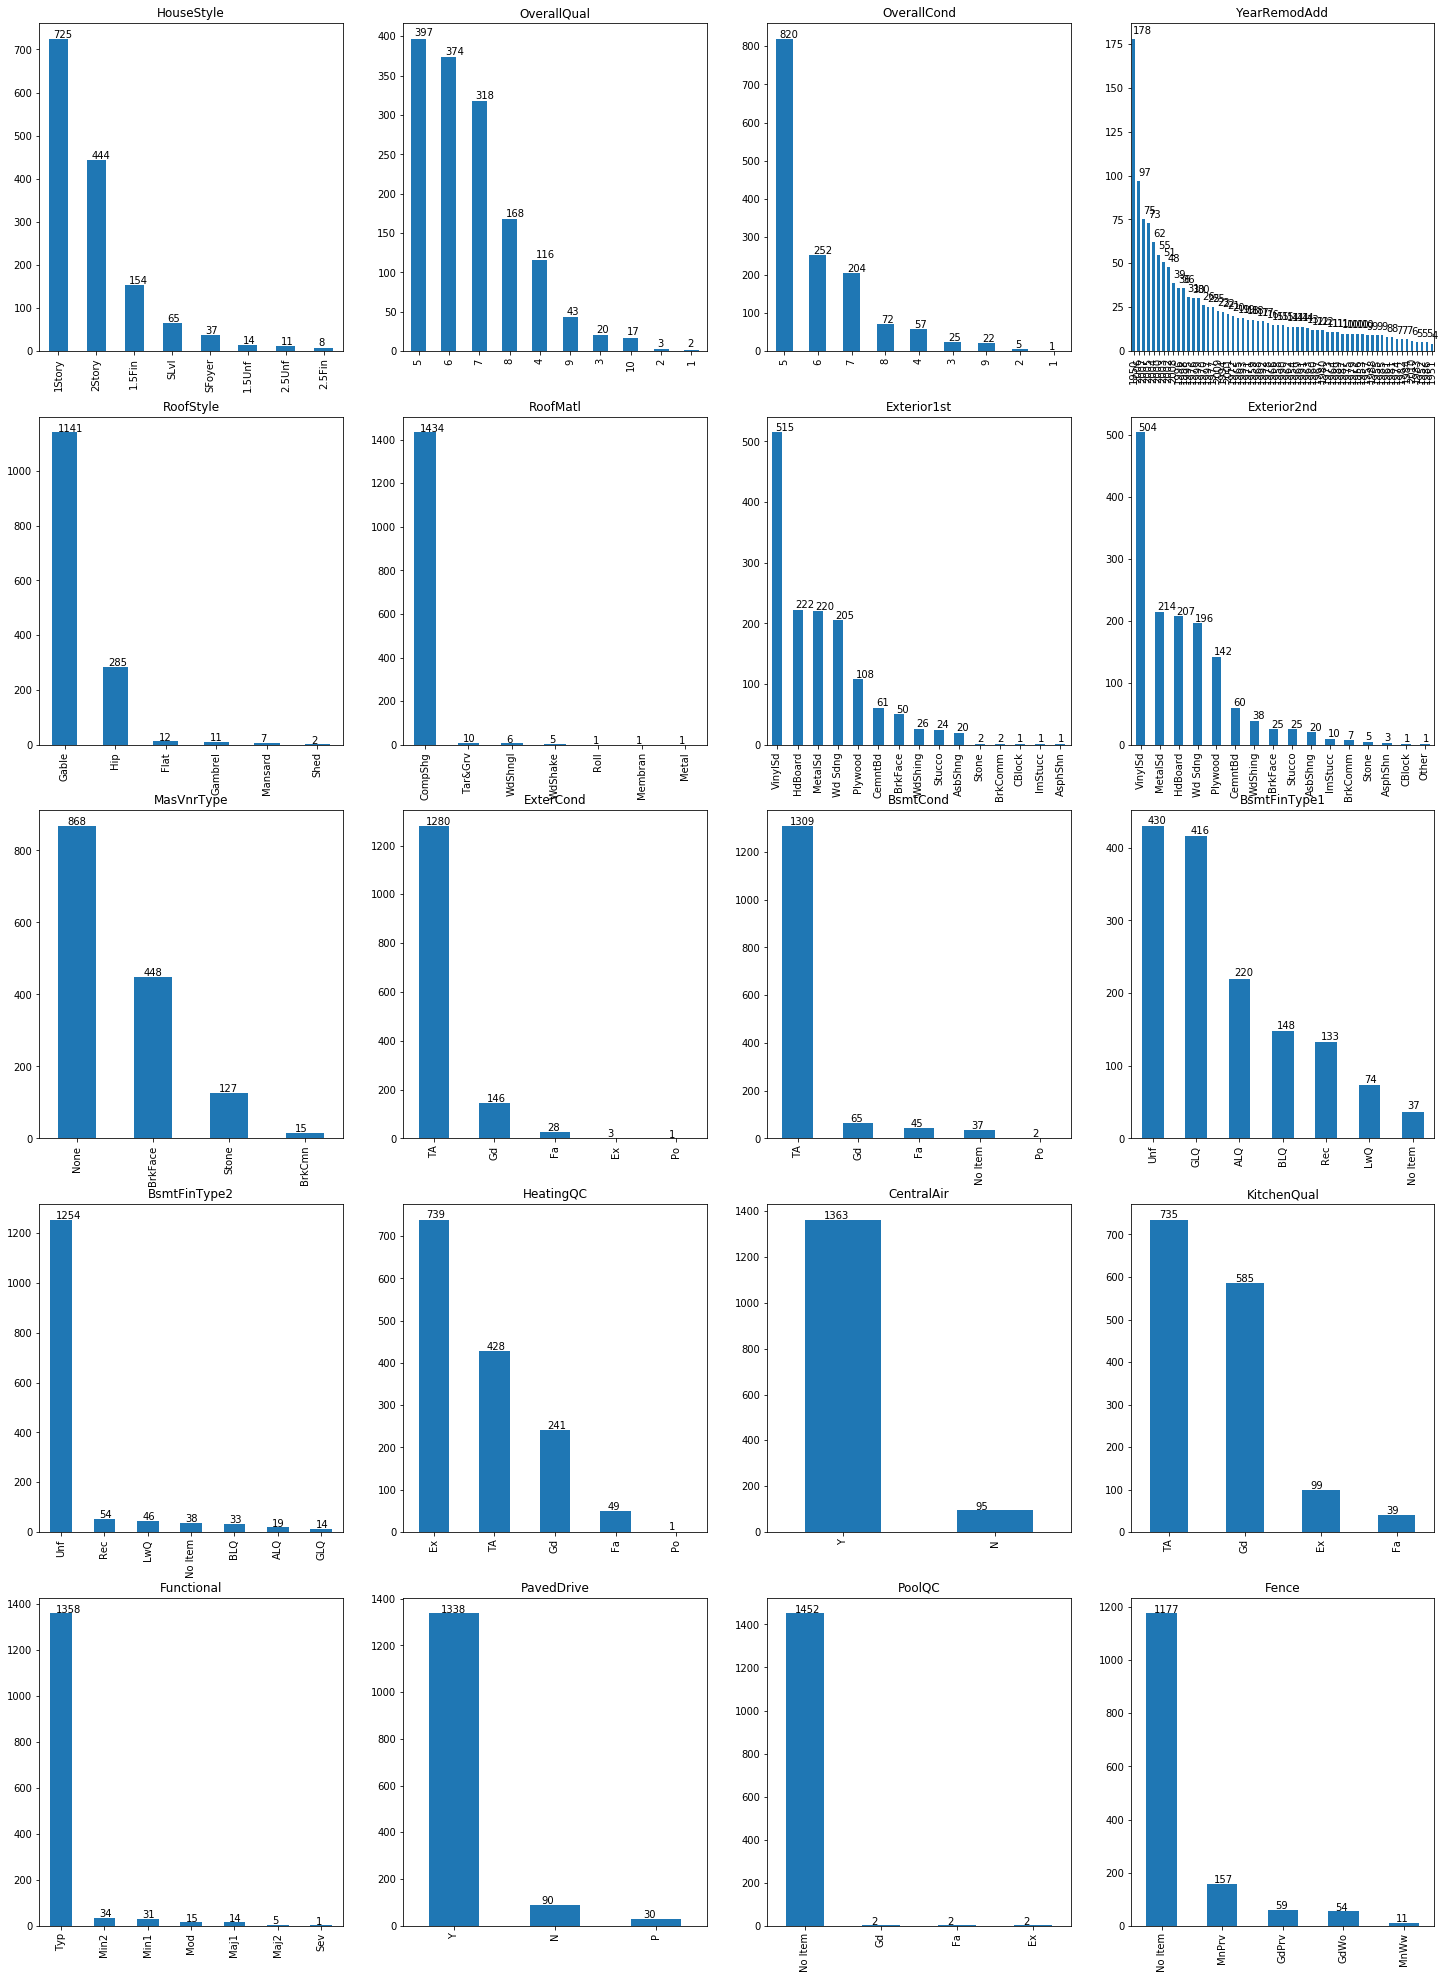

In [105]:
fig, axes = plt.subplots(nrows=5, ncols=4)
i=0
j=0
for col in varList:
    ax = df[col].value_counts().plot(kind='bar', ax=axes[i,j], figsize=(25,35),title = col)    
    for p in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(p.get_x()+.12, p.get_height()+3, 
            str(p.get_height()))
        
    j+=1    
    if(j==4):
        j=0
        i+=1
    
plt.show()

<b>Analysis:</b><br><br>
<b>Roof Style and Roof Material: </b>Even though the first set of plots shows a significant difference between the most expensive and least expensive Roof Style, this second set of plots shows that the roof styles are predomintantly "Gable" with material "standard Shingle". As we have very few observations of the other types of Roof and types of material, we cannot draw statistically relevant conclusions. As a result, these variable will not be among those we will suggest to be improved.<br>
<b>Pool Quality:</b> Same idea: not enough houses with pool to draw significant conclusions. Improving the quality of the pool will not be suggested to owners.<br>
<b>Central Air:</b> Most of the houses on this sample have central air, which means that it is possible to find houses with several combinations of the other variables that have that feature. In other words, a buyer will either look for another house or make a very low offer. We understand it is not a simple service but, by analysing the first plot for this variable, we notice an increment of $80,000 on average. It is too early for recommendations, but we found this information relevant.<br>

<b>2) Are the categories in an expected order?</b>

<b>Analysis:</b><br><br>
<b>2.1House Style:</b> <u>This is our first surprise!</u> We were not expecting the average selling price of a 1 story house being more expensive than a one and a half story (finished or unfinished) and more expensive than a two stories with 2nd level unfinished. We need to investigate this, and we can think of 2 hypotheses:<br>
<ul><li>2.1.1) 1.5 and 2 stories houses with 2nd level unfinished are located in "poor" neighborhoods?</li>
    <li>2.1.2) 1.5 and 2 stories houses with 2nd level unfinished are older?</li></ul>
    
Let's test those two hypotheses:

<b>2.1.1) 1.5 finished, 1.5 unfinished and 2 stories houses with 2nd level unfinished are located in "poor" neighborhoods?</b>

In [106]:
#select 10 Neighborhoods where average prices are the lowest
poorList = list(df[['Neighborhood', 'SalePrice']].groupby('Neighborhood').mean().sort_values('SalePrice').head(10).index)

#check if most of the data we have on 1.5 and 2 stories houses with 2nd level unfinished are located on those neighborhoods
valueList = ['1.5Unf', '1.5Fin','2.5Unf']
poorDict = {}
totalDict = {}

#initialize dicts
for value in valueList:
    poorDict[value] = 0
    totalDict[value] = 0
    
for row in df.index:
    for value in valueList:
        if(df.loc[row,'HouseStyle'] == value):
            totalDict[value]+=1
            if(df.loc[row, 'Neighborhood'] in poorList):
               poorDict[value]+=1
            
print(' STYLE  - % ON POOR NEIGHBORHOODS')

for value in valueList:
    print(value, ' - ',str(round(poorDict[value]/totalDict[value],2)*100) + '%')
               
        

 STYLE  - % ON POOR NEIGHBORHOODS
1.5Unf  -  71.0%
1.5Fin  -  73.0%
2.5Unf  -  91.0%


<b>Comment</b>: As we may see, the hypotheses is very likely to be <b>TRUE</b>: most of the houses of the Style "1.5 finished", "1.5 unfinished" and "2 stories houses with 2nd level unfinished" are located in "poor" neighborhoods. This helps explain why the average price of 1 story houses being greater than those categories listed above.

<b>2.1.2) 1.5 finished, 1.5 unfinished and 2 stories houses with 2nd level unfinished are older?</b>

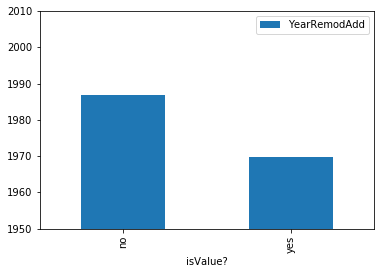

In [107]:
#create a mapping dictionary
mapping = {"1.5Fin":"yes","1.5Unf":"yes","2.5Unf":"yes"}

#create column that identifies the values 1.5 finished, 1.5 unfinished and 2 unfinished as "yes"
df['isValue?'] = df.HouseStyle.map(mapping)

#values that do not belong to the list will be filled by NaN. Let's replace it by "no"
df['isValue?'] = df['isValue?'].replace(np.nan, "no")

#plot the average year built (or year remodeled), grouped by belonging to the list or not
df[['isValue?', 'YearRemodAdd']].groupby('isValue?').mean().plot(kind='bar', ylim=(1950, 2010))

<b>Comment</b>: Once again, this hypotheses is very likely to be <b>TRUE</b> as well, because we can easily notice that houses that fits the style "1.5 finished" or "1.5 unfinished" or "2 stories houses with 2nd level unfinished" are <b>17 years older</b>, on average, than the houses that fit the other categories.<br><br>
The two hypotheses tested are very likely to be true, and maybe there are other factors contributing to this phenomena. For now, we are happy with our findings regarding the Selling price X House Style.


<b>2.2 Overall Condition</b>: we expected the average of the selling price to behave the same way as it did when ploting against "Overall Quality": price increasing linearly as the quality increases, but that is not the case. Let's plot it again, but now ordered by the "Overall Condition" rating. 

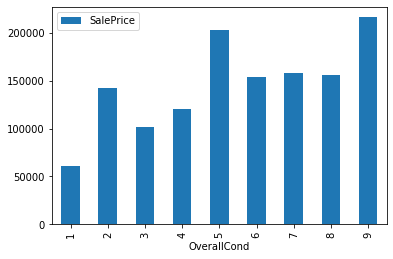

In [108]:
df[['OverallCond', 'SalePrice']].groupby('OverallCond').mean().sort_values('OverallCond').plot(kind="bar")    
    

We notice some unexpected values, like when the overall condition is 2, 5, 7 and 8. One reasonable explanation would be that Overall Condition is subjective, unlike Overall Quality of the materials used in a house. If we consider that more than one person were responsible for the collection of the data, discrepancies like that are expected.<br><br>
Hopefully, our algorithm will yield less weight for this feature, as the correlation to the Selling Price is not the best.

<b>2.3 Basement Finished area</b>: we did NOT expect "unfinished" basement to be the second most expensive category, higher then "Average Living Quarters". One hypotheses would be a similar study we made above for the "House Style": analyse the Neighborhood and the Year Built. We will not validate this hypothesis as it would be very similar to the study we made above.

<b>Final note on Category order</b>: to explore this matter in more detail, we would have to research price of materials for finishing the exterior, the fence, basement, masonry veneer, heating, etc. Then we could investigate if a house built with superior quality materials is cheaper than other houses built with inferior materials. As we don't have that information handy, we will not proceed in that direction.

 <b>3) Considering the "Year Remodeled", are the years also ordered from oldest to newest?</b>

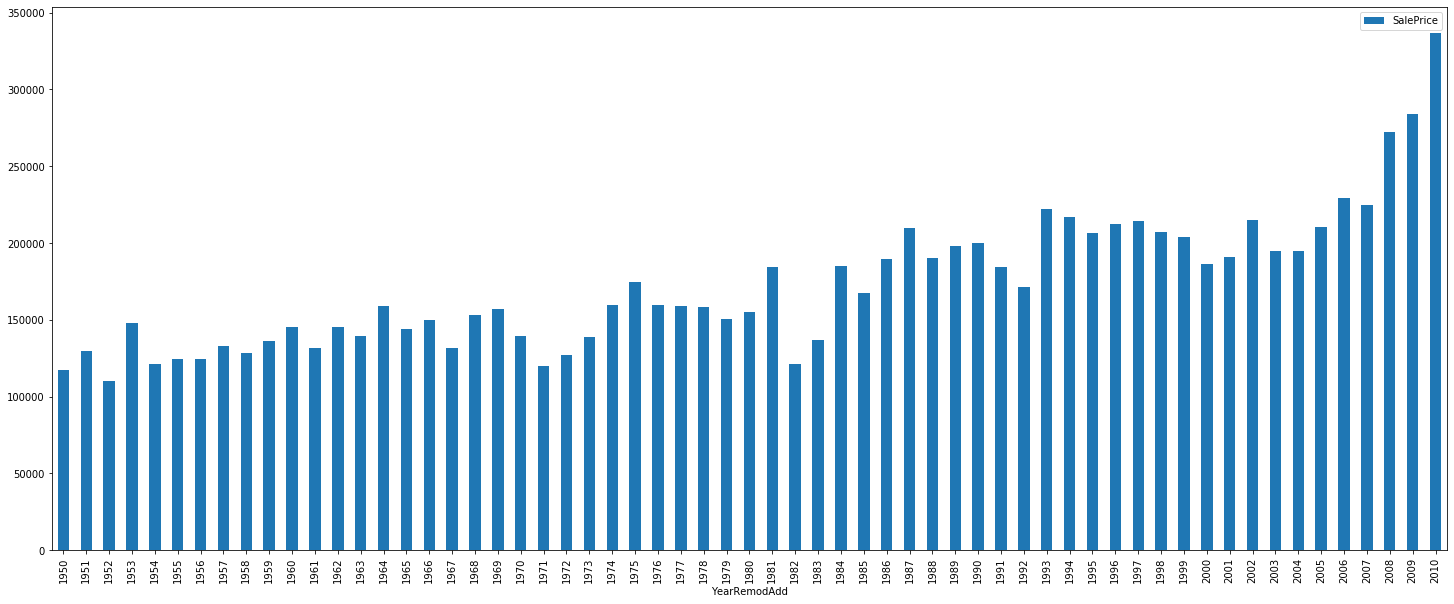

In [109]:
df[['YearRemodAdd', 'SalePrice']].groupby('YearRemodAdd').mean().sort_values('YearRemodAdd').plot(kind="bar", figsize=(25,10)) 

The general trend is the way we expected: the older the house, the cheaper.<br>
For our study, this is excellent! We can count on the combining effect a house improvement service would have, both on the variable being directly affected by the service and also by the date of the remodeling, which will be more recent.

<b>4) Are there any actionable variables that are not worth investing on?</b>

We've already identified the variables "roof type", "roof Material and "pool Quality" as variables that, with the amount of information we have at the moment, are not worth investing on. Other than that, no other variable was identified as not worth of investments.

<b>5) Regardless of the caracteristics of the houses, considering the year sold, do prices increase along the years on average?</b>

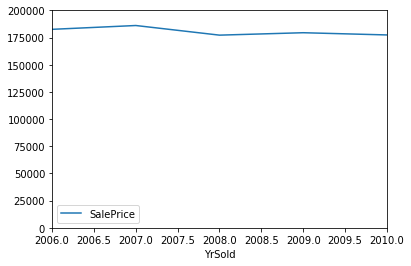

In [110]:
df[['YrSold', 'SalePrice']].groupby('YrSold').mean().plot(ylim=(0,200000))

<b>Answer:</b> No, which means we don't need to take inflation into consideration on our analysis.

<b>6) Other surprises?</b>

The jump on the average selling price when the basement finished area goes from any category to Good Living Quarters is enormous. It is almost $100,000.00. Which means: if you're going to improve your basement, make it very good because it is worth it. Otherwise, your basement may fall into an average quality and you'll loose your investment.

<b>Extra: Scatter plot between LotArea and LotFrontage.</b><br><br>
This has been presented already on the Data Wrangling Report because we needed a method to fill the NaNs. We will show the code and the output again, as it is part of what is requested in this report.

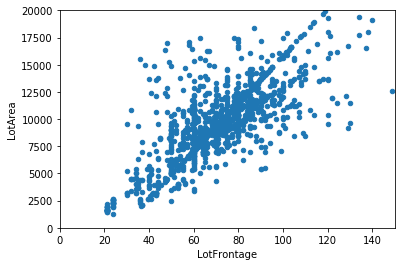

In [111]:
df[['LotFrontage', 'LotArea']].plot(x = 'LotFrontage', y = 'LotArea', xlim=(0,150), ylim=(0, 20000), kind = 'scatter')

As stated on the previous report, a correlation between those two variables is identified